# Homework 7: 
## Riccardo Tancredi - riccardo.tancredi@studenti.unipd.it
---
Choose one of the examples on feedback loop (can be either positive or negative) and simulate it. Try to combine two feedback loops (or simulating the genetic network shown in class or creating one yourself), simulate it and describe in few sentences the results of the simulations (like "what's going on" in the simulation).

In [1]:
# Simulating the Stress Response Negative Feedback Loop:
import numpy as np
import matplotlib.pyplot as plt
from ODESolver import RungeKutta4
plt.rcParams.update({'font.size': 10})  
np.random.seed(12012024)

%matplotlib inline

In [2]:
class stress_response:
    def __init__(self, k, tau_E, theta, gamma, h, R_0, t_s):
        self.k = k
        self.tau_E = tau_E
        self.theta = theta
        self.gamma = gamma
        self.h = h
        self.R_0 = R_0
        self.t_s = t_s
        
    def __call__(self, t, u):
        E, S = u[0], u[1]
        R_frac = self.R_0/(1.+S)
        dE = 1./(1.+(R_frac/self.k)**self.h) - E/self.tau_E if t > self.t_s else 0
        dS = self.theta - self.gamma*E*S if t > self.t_s else 0
        return dE, dS

In [3]:
k, tau_E, theta, gamma, h, R_0, t_s = [8, 4.2, 9, 0.6, 10, 16, 20]
negative_feedback_simulation = stress_response(k=k,
                                               tau_E=tau_E,
                                               theta=theta,
                                               gamma=gamma,
                                               h=h, 
                                               R_0=R_0,
                                               t_s=t_s)

evolution = RungeKutta4(negative_feedback_simulation)
E_0 = 4
S_0 = 3.57
evolution.set_initial_condition([E_0, S_0])
t, u = evolution.solve(t_span=(0, 100), N=10000)

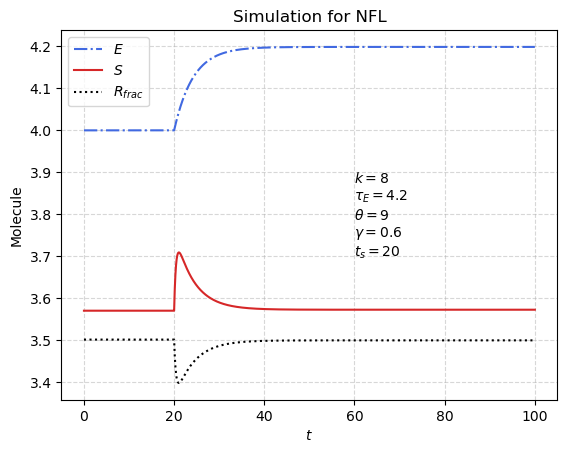

In [4]:
plt.plot(t, u[:, 0], label=r'$E$', ls='-.', color='royalblue')
plt.plot(t, u[:, 1], label=r'$S$', ls='-', color='tab:red')
plt.plot(t, R_0/(1+u[:, 1]), label=r'$R_{frac}$', ls=':', color='k')


# plt.vlines(t_0, min(u[:, 1]), max(u[:, 0]), color="deepskyblue", ls=':', label=r'$t_{stat}$' + f' = {int(t_0)}')
plt.xlabel(r'$t$')
plt.ylabel('Molecule')
plt.text(60, 3.7, r'$k =$'+f'{k}\n'+r'$\tau_E =$'+f'{tau_E}\n'+r'$\theta =$'+f'{theta}\n'+r'$\gamma =$'+f'{gamma}\n'+r'$t_s =$'+f'{t_s}')
plt.title('Simulation for NFL')
plt.legend()
plt.grid(ls='--', alpha=0.5)
plt.savefig('NFL.png', dpi=300)
plt.show()

The above plot is an example of a **negative feedback loop** dynamics describing stress molecules ($\textcolor{red}{S}$) response. Stress molecules are indeed controlled by enzyme molecules $\textcolor{blue}{E}$ since $\textcolor{red}{\dot{S}} \propto - \textcolor{red}{S} \textcolor{blue}{\bold{E}}$.  After a set time $t_s$ the number of stress molecules raises. Then, the fraction of repressor molecules $\textcolor{black}{R_{frac}}$ decreases promoting the growth of $\textcolor{blue}{E}$ molecules since 
\begin{equation*}
    \textcolor{blue}{\dot{E}} \propto \frac{1}{1+\mathcal{K} \textcolor{black}{R^{h}_{frac}}}
\end{equation*} 

This behaviour progressively leads to a decrease in the population of stress molecules $\textcolor{red}{S}$. This is observed up to a spike in the $\textcolor{red}{S}$ curve which progressively reduces due to the raising of $\textcolor{blue}{E}$ molecules. $\textcolor{black}{R_{frac}}$ curve is almost symmetric with respect to the $\textcolor{red}{S}$ curve as the more $\textcolor{red}{S}$ molecules, the fewer repressors $\textcolor{black}{R_{frac}}$ are present and vice versa.  

Genetic network: combining NFL and PFL

In [5]:
class genetic_network:
    def __init__(self, k_E, k_T, h_E, h_T, l, theta, sigma, R_0, t_s):
        self.k_E = k_E
        self.k_T = k_T
        self.h_E = h_E
        self.h_T = h_T
        self.l = l
        self.theta = theta
        self.sigma = sigma
        self.R_0 = R_0
        self.t_s = t_s
        
    def __call__(self, t, u):
        E, S, T = u[0], u[1], u[2]
        R_frac = self.R_0/(1.+S)
        dE = 1./(1.+(R_frac/self.k_E)**self.h_E) + self.l if t > self.t_s else 0
        dS = self.theta*T - self.sigma*E*S if t > self.t_s else 0
        dT = 1./(1.+(R_frac/self.k_T)**self.h_T) + self.l if t > self.t_s else 0
        return dE, dS, dT

In [6]:
init = [2, 1, 1, 1, 1e-8, 9, 0.6, 40, 20]
k_E, k_T, h_E, h_T, l, theta, sigma, R_0, t_s = init
genetic_network_simulation = genetic_network(*init)

evolution = RungeKutta4(genetic_network_simulation)
E_0 = 4e-7
S_0 = 3
T_0 = 5e-7
evolution.set_initial_condition([E_0, S_0, T_0])
t, u = evolution.solve(t_span=(0, 100), N=10000)

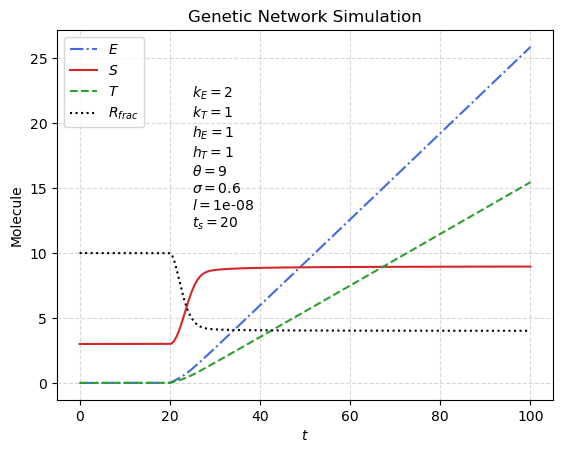

In [7]:
plt.plot(t, u[:, 0], label=r'$E$', ls='-.', color='royalblue')
plt.plot(t, u[:, 1], label=r'$S$', ls='-', color='tab:red')
plt.plot(t, u[:, 2], label=r'$T$', ls='--', color='tab:green')
plt.plot(t, R_0/(1+u[:, 1]), label=r'$R_{frac}$', ls=':', color='k')


# plt.vlines(t_0, min(u[:, 1]), max(u[:, 0]), color="deepskyblue", ls=':', label=r'$t_{stat}$' + f' = {int(t_0)}')
plt.xlabel(r'$t$')
plt.ylabel('Molecule')
k_E, k_T, h_E, h_T, l, theta, sigma, R_0, t_s = init
stringa = r'$k_E=$'+f'{k_E}\n'+r'$k_T=$'+f'{k_T}\n'+r'$h_E=$'+f'{h_E}\n'+r'$h_T=$'+f'{h_T}\n'+r'$\theta=$'+f'{theta}\n'+r'$\sigma=$'+f'{gamma}\n'+r'$l=$'+f'{l}\n'+r'$t_s=$'+f'{t_s}'
plt.text(25, 12, stringa)
# plt.text(0.7, 0.32, 'Expected equilibrium point:\n'+r'$(x^\star, y^\star)$ = '+f'({round(x_star, 1)}, {round(y_star, 1)})')
plt.title('Genetic Network Simulation')
plt.legend()
plt.grid(ls='--', alpha=0.5)
plt.savefig('GN.png', dpi=300)
plt.show()

The provided molecular dynamics shows a peculiar case of combination of positive and negative feedback loops with the aim to realize a **genetic network**. The plot highlights first, after a time $t_s$, the increses in stress molecules $\textcolor{red}{S}$ due to the gradually higher concentration of $\textcolor{green}{T}$ regulator cells: $\textcolor{red}{\dot{S}}\propto \textcolor{green}{T}$. 

But then, the concentration of $\textcolor{red}{S}$ molecules reaches a plateau due to the increase of $\textcolor{blue}{E}$ molecules: $\textcolor{red}{\dot{S}}\propto -\bold{\textcolor{blue}{E}}\textcolor{red}{S}$. When this plateau is reached, $\textcolor{black}{R_{frac}}$ reaches a lower spot too because of its dependence on $\textcolor{red}{S}$: $\textcolor{black}{R_{frac}} \propto \frac{1}{1+\textcolor{red}{S}}$. 

In the meanwhile, $\textcolor{blue}{E}$ and $\textcolor{green}{T}$ follow a **positive feedback loop** dynamics growing unconditionally. 